In [3]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score


In [23]:
#prf_I5_2000_9_norm_landsat8.csv

data = pd.read_csv('prf_I5_2000_9_norm_landsat8.csv')
print(data.head())  # This line prints the first few rows of the dataset.

       area       age  site_index  band1_mean  band2_mean  band3_mean  \
0  0.099653  0.387879    0.322036    0.015679    0.007154    0.023679   
1  0.062917  0.218182    0.224337    0.020886    0.013045    0.036076   
2  0.106332  0.218182    0.418960    0.028977    0.034632    0.047969   
3  0.031659  0.151515    0.281100    0.017399    0.032371    0.053789   
4  0.033796  0.230303    0.278414    0.017956    0.007300    0.019674   

   band4_mean  band5_mean  band7_mean     Target  
0    0.204062    0.042123    0.029575  433.49060  
1    0.140909    0.175420    0.106167   83.50726  
2    0.448081    0.325483    0.161073  263.37860  
3    0.210542    0.187923    0.100241   56.77525  
4    0.181456    0.030828    0.028489  188.75957  


In [11]:
data.describe()

,area,age,site_index,band1_mean,band2_mean,band3_mean,band4_mean,band5_mean,band7_mean,Target
count,557.000000,557.000000,557.000000,557.000000,557.000000,557.000000,557.000000,557.000000,557.000000,557.000000
mean,0.177335,0.516218,0.268200,0.077724,0.091579,0.088850,0.457139,0.294913,0.155115,268.660111
std,0.136919,0.180190,0.079977,0.114705,0.108215,0.105918,0.159086,0.117612,0.091425,137.698689
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.079215,0.424242,0.228552,0.035422,0.049701,0.048628,0.352073,0.221484,0.112609,167.790560
50%,0.145338,0.545455,0.265132,0.045296,0.064865,0.061392,0.447573,0.287911,0.140604,260.587620
75%,0.235506,0.648485,0.304128,0.063862,0.085831,0.079590,0.556720,0.353344,0.177832,364.213590
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,672.752440


In [14]:
pip install matplotlib seaborn

Note: you may need to restart the kernel to use updated packages.


In [5]:
import pandas as pd

# Load Landsat data
landsat_data = pd.read_csv('prf_I5_2000_9_norm_landsat8.csv')

# Load LiDAR data
lidar_data = pd.read_csv('tvol_lidarP.csv')

# Display the first few rows of the datasets
print("Landsat Data Preview:")
display(landsat_data.head())
print("LiDAR Data Preview:")
display(lidar_data.head())


Landsat Data Preview:


,area,age,site_index,band1_mean,band2_mean,band3_mean,band4_mean,band5_mean,band7_mean,Target
0,0.099653,0.387879,0.322036,0.015679,0.007154,0.023679,0.204062,0.042123,0.029575,433.49060
1,0.062917,0.218182,0.224337,0.020886,0.013045,0.036076,0.140909,0.175420,0.106167,83.50726
2,0.106332,0.218182,0.418960,0.028977,0.034632,0.047969,0.448081,0.325483,0.161073,263.37860
3,0.031659,0.151515,0.281100,0.017399,0.032371,0.053789,0.210542,0.187923,0.100241,56.77525
4,0.033796,0.230303,0.278414,0.017956,0.007300,0.019674,0.181456,0.030828,0.028489,188.75957


LiDAR Data Preview:


,Status,origin,zmax,zmean,zsd,zskew,zkurt,pzabovezmean,pzabove2,zq5,...,zpcum1,zpcum2,zpcum3,zpcum4,zpcum5,zpcum6,zpcum7,zpcum8,zpcum9,Target
0,0.0,0.0,0.692364,0.421941,0.503111,0.503530,0.031636,0.287178,0.912084,0.003991,...,0.057731,0.166444,0.561836,0.715985,0.750118,0.777899,0.838672,0.904644,0.937477,1.381989
1,1.0,1.0,0.692364,0.421941,0.503111,0.503530,0.031636,0.287178,0.912084,0.003991,...,0.057731,0.166444,0.561836,0.715985,0.750118,0.777899,0.838672,0.904644,0.937477,323.132202
2,1.0,1.0,0.667812,0.517221,0.613245,0.444484,0.004845,0.550541,0.977677,0.159645,...,0.027921,0.365838,0.496470,0.505387,0.523731,0.548082,0.662059,0.820457,0.897849,353.671565
3,0.0,1.0,0.478026,0.580863,0.363620,0.314388,0.054912,0.786907,0.939859,0.038869,...,0.052749,0.083475,0.100948,0.117819,0.160610,0.249432,0.386766,0.570342,0.719632,28.793416
4,1.0,1.0,0.478026,0.580863,0.363620,0.314388,0.054912,0.786907,0.939859,0.038869,...,0.052749,0.083475,0.100948,0.117819,0.160610,0.249432,0.386766,0.570342,0.719632,253.695027


In [7]:
print("Landsat Data Statistics:")
display(landsat_data.describe())
print("LiDAR Data Statistics:")
display(lidar_data.describe())


Landsat Data Statistics:


,area,age,site_index,band1_mean,band2_mean,band3_mean,band4_mean,band5_mean,band7_mean,Target
count,557.000000,557.000000,557.000000,557.000000,557.000000,557.000000,557.000000,557.000000,557.000000,557.000000
mean,0.177335,0.516218,0.268200,0.077724,0.091579,0.088850,0.457139,0.294913,0.155115,268.660111
std,0.136919,0.180190,0.079977,0.114705,0.108215,0.105918,0.159086,0.117612,0.091425,137.698689
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.079215,0.424242,0.228552,0.035422,0.049701,0.048628,0.352073,0.221484,0.112609,167.790560
50%,0.145338,0.545455,0.265132,0.045296,0.064865,0.061392,0.447573,0.287911,0.140604,260.587620
75%,0.235506,0.648485,0.304128,0.063862,0.085831,0.079590,0.556720,0.353344,0.177832,364.213590
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,672.752440


LiDAR Data Statistics:


,Status,origin,zmax,zmean,zsd,zskew,zkurt,pzabovezmean,pzabove2,zq5,...,zpcum1,zpcum2,zpcum3,zpcum4,zpcum5,zpcum6,zpcum7,zpcum8,zpcum9,Target
count,375.00000,375.000000,375.000000,375.000000,375.000000,375.000000,375.000000,375.000000,375.000000,375.000000,...,375.000000,375.000000,375.000000,375.000000,375.000000,375.000000,375.000000,375.000000,375.000000,375.000000
mean,0.66400,0.794667,0.534487,0.450688,0.430177,0.399249,0.050989,0.632018,0.793102,0.066413,...,0.178461,0.218992,0.281191,0.349396,0.427387,0.531682,0.664802,0.806822,0.875854,191.760731
std,0.47297,0.404485,0.173069,0.192263,0.187130,0.100607,0.095463,0.165131,0.187956,0.162669,...,0.185457,0.196743,0.214252,0.226611,0.235224,0.238024,0.225248,0.175952,0.135290,189.909863
min,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.587500
25%,0.00000,1.000000,0.425976,0.298388,0.300929,0.348136,0.015357,0.537283,0.695987,0.000000,...,0.044763,0.069426,0.109781,0.169493,0.239478,0.340251,0.483965,0.729561,0.847034,16.351330
50%,1.00000,1.000000,0.540388,0.445337,0.420101,0.402126,0.026014,0.657714,0.862197,0.003991,...,0.096809,0.144701,0.235683,0.321557,0.422528,0.561679,0.719532,0.859607,0.918641,163.130614
75%,1.00000,1.000000,0.650994,0.580554,0.553752,0.452251,0.048526,0.743960,0.927459,0.023282,...,0.261925,0.320279,0.420486,0.499647,0.600734,0.709721,0.855124,0.931094,0.962197,287.007096
max,1.00000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,948.977025


In [9]:
print("Missing values in Landsat Data:")
print(landsat_data.isnull().sum())
print("Missing values in LiDAR Data:")
print(lidar_data.isnull().sum())


Missing values in Landsat Data:
area          0
age           0
site_index    0
band1_mean    0
band2_mean    0
band3_mean    0
band4_mean    0
band5_mean    0
band7_mean    0
Target        0
dtype: int64
Missing values in LiDAR Data:
Status          0
origin          0
zmax            0
zmean           0
zsd             0
zskew           0
zkurt           0
pzabovezmean    0
pzabove2        0
zq5             0
zq10            0
zq15            0
zq20            0
zq25            0
zq30            0
zq35            0
zq40            0
zq45            0
zq50            0
zq55            0
zq60            0
zq65            0
zq70            0
zq75            0
zq80            0
zq85            0
zq90            0
zq95            0
zpcum1          0
zpcum2          0
zpcum3          0
zpcum4          0
zpcum5          0
zpcum6          0
zpcum7          0
zpcum8          0
zpcum9          0
Target          0
dtype: int64


Matplotlib is building the font cache; this may take a moment.


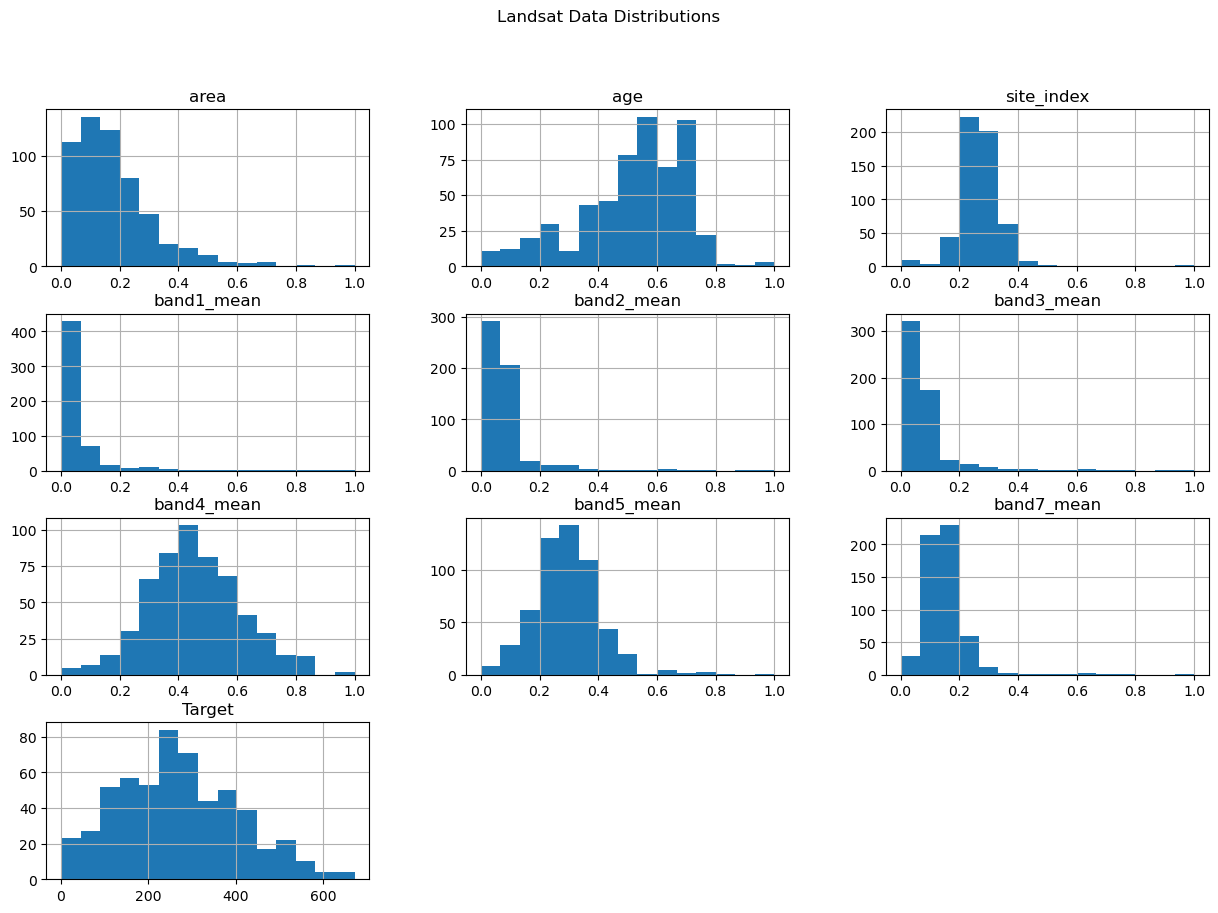

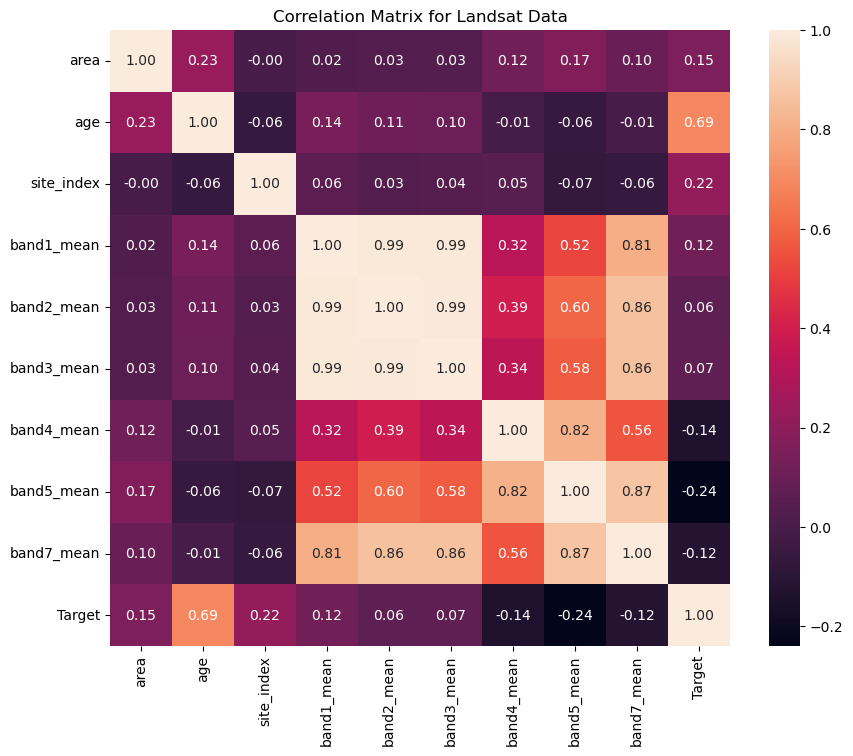

In [11]:
import seaborn as sns
import matplotlib.pyplot as plt

# Histograms for Landsat data
landsat_data.hist(bins=15, figsize=(15, 10))
plt.suptitle("Landsat Data Distributions")
plt.show()

# Correlation matrix heatmap for Landsat data
plt.figure(figsize=(10, 8))
sns.heatmap(landsat_data.corr(), annot=True, fmt=".2f")
plt.title("Correlation Matrix for Landsat Data")
plt.show()


In [25]:
number_data = data.select_dtypes(include = 'number').corr()
 
values = number_data['Target']
print(values.tolist())

[0.15463274845062877, 0.6920558093278224, 0.21998383574233749, 0.11585930412484571, 0.06297323631354441, 0.06849014350992776, -0.1366424542828825, -0.23923621394416084, -0.12066816059026546, 1.0]


In [9]:
# Import necessary libraries
import pandas as pd

# Load the dataset
df = pd.read_csv('tvol_lidarLiveP.csv')  # Changed read_excel to read_csv since file is CSV format

# Display the first few rows of the dataset to check everything is loaded correctly
print(df.head())

   Status  origin      zmax     zmean       zsd     zskew     zkurt  \
0       1       0  0.482936  0.393575  0.640931  0.417088  0.000799   
1       1       0  0.619445  0.744484  0.669192  0.315335  0.035721   
2       1       0  0.590965  0.552324  0.719417  0.387989  0.005110   
3       1       0  0.585318  0.735132  0.211343  0.251785  0.194261   
4       1       0  0.297815  0.381137  0.203122  0.251367  0.095055   

   pzabovezmean  pzabove2       zq5  ...    zpcum1    zpcum2    zpcum3  \
0      0.653559  0.543409  0.000000  ...  0.228816  0.217799  0.216589   
1      0.972526  0.832260  0.000000  ...  0.066177  0.098509  0.116252   
2      0.749769  0.738540  0.000000  ...  0.217498  0.280967  0.292151   
3      0.687752  0.986705  0.679823  ...  0.001473  0.000000  0.000000   
4      0.959945  0.893755  0.000000  ...  0.050555  0.047751  0.052850   

     zpcum4    zpcum5    zpcum6    zpcum7    zpcum8    zpcum9      Target  
0  0.214684  0.208958  0.211244  0.275474  0.485716 

In [19]:
# Check for missing values
print("Missing values per column:")
print(df.isnull().sum())

# Get a concise summary of the dataframe
print("\nDataframe Info:")
print(df.info())

# Describe the data to get statistical summaries of numerical columns
print("\nStatistical Summary:")
print(df.describe())

# Display the shape of the dataframe to know how many rows and columns it has
print("\nDataframe Shape:")
print(df.shape)

Missing values per column:
Status          0
origin          0
zmax            0
zmean           0
zsd             0
zskew           0
zkurt           0
pzabovezmean    0
pzabove2        0
zq5             0
zq10            0
zq15            0
zq20            0
zq25            0
zq30            0
zq35            0
zq40            0
zq45            0
zq50            0
zq55            0
zq60            0
zq65            0
zq70            0
zq75            0
zq80            0
zq85            0
zq90            0
zq95            0
zpcum1          0
zpcum2          0
zpcum3          0
zpcum4          0
zpcum5          0
zpcum6          0
zpcum7          0
zpcum8          0
zpcum9          0
Target          0
dtype: int64

Dataframe Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 249 entries, 0 to 248
Data columns (total 38 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Status        249 non-null    int64  
 1   origin        249 no

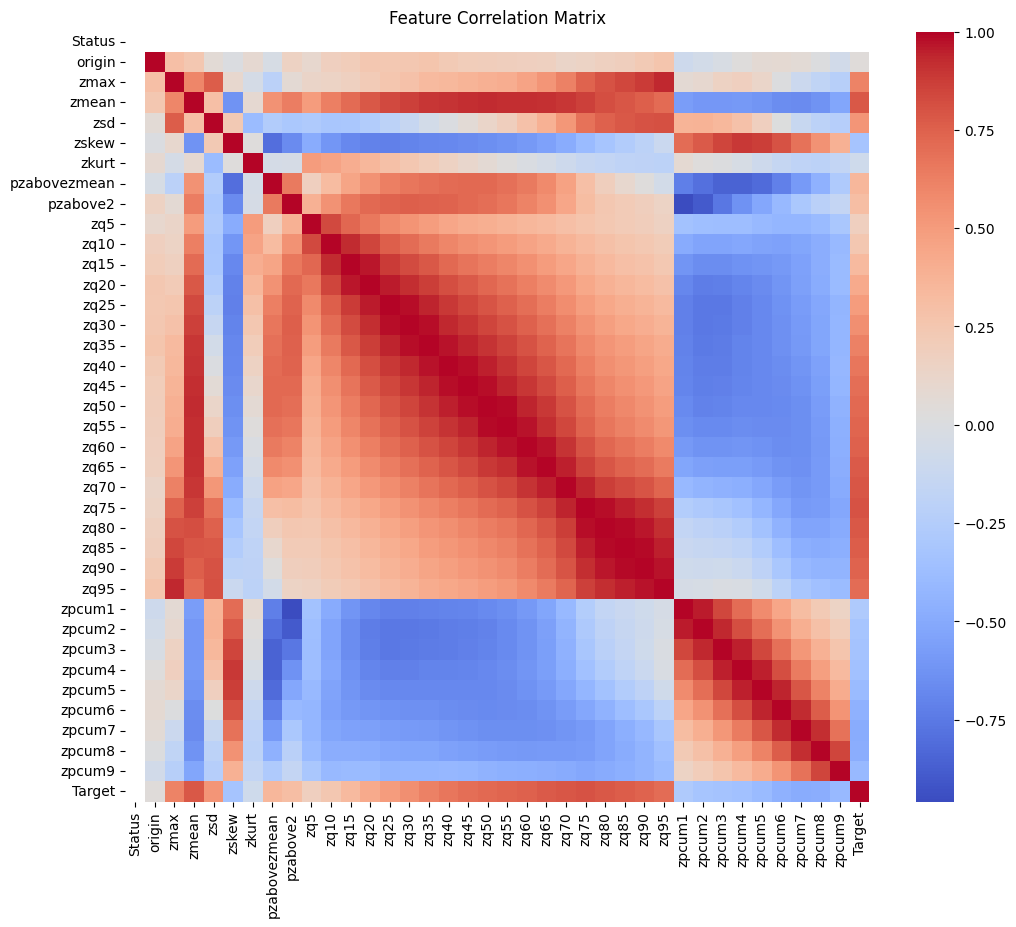

In [21]:
import seaborn as sns
import matplotlib.pyplot as plt

# Compute the correlation matrix
corr_matrix = df.corr()

# Generate a heatmap to visualize the correlation matrix
plt.figure(figsize=(12, 10))
sns.heatmap(corr_matrix, annot=False, cmap='coolwarm')
plt.title('Feature Correlation Matrix')
plt.show()


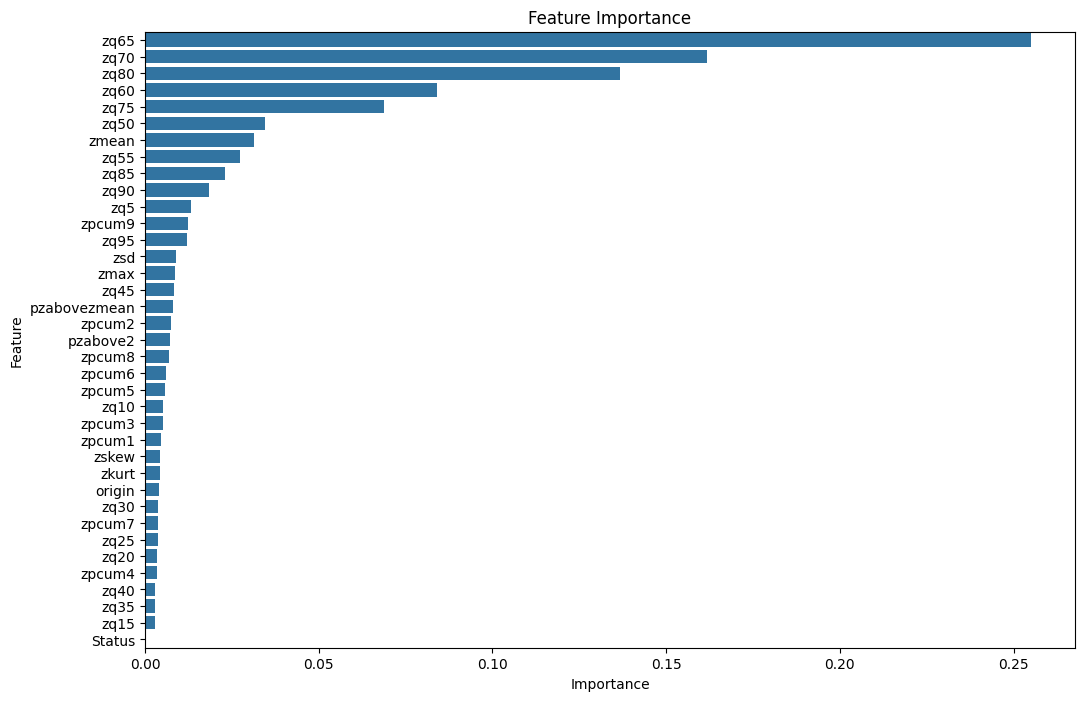

In [23]:
from sklearn.ensemble import RandomForestRegressor

# Preparing the data
X = df.drop('Target', axis=1)  # Features
y = df['Target']  # Target variable

# Initialize and train the RandomForestRegressor
model = RandomForestRegressor(n_estimators=100, random_state=42)
model.fit(X, y)

# Get feature importances
importances = model.feature_importances_

# Visualize feature importances
features = pd.DataFrame({'Feature': X.columns, 'Importance': importances})
features.sort_values(by='Importance', ascending=False, inplace=True)

plt.figure(figsize=(12, 8))
sns.barplot(x='Importance', y='Feature', data=features)
plt.title('Feature Importance')
plt.show()


In [35]:
# Print all column names in the DataFrame
print(df.columns)


Index(['Feature Selection Technique', 'Comments',
       'Test Train Validation Ratio', 'Model', 'Parameter', 'Performance',
       'Accuracy', 'R2', 'RMSE'],
      dtype='object')


In [33]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score
import numpy as np

# Preparing the data
X = df.drop('Target', axis=1)  # Features
y = df['Target']  # Target variable

# Splitting the dataset into the Training set and Test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize and train the RandomForestRegressor
model = RandomForestRegressor(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

# Predicting the Test set results
y_pred = model.predict(X_test)

# Calculate R2 Score
r2 = r2_score(y_test, y_pred)
print(f'R2 Score: {r2}')

# Calculate RMSE
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
print(f'RMSE: {rmse}')

# Get feature importances
importances = model.feature_importances_

# Visualize feature importances
features = pd.DataFrame({'Feature': X.columns, 'Importance': importances})
features.sort_values(by='Importance', ascending=False, inplace=True)

import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(12, 8))
sns.barplot(x='Importance', y='Feature', data=features)
plt.title('Feature Importance')
plt.show()

# Assuming you want to add these results to an Excel sheet
results = {
    'Feature Selection Technique': ['Random Forest Importance'],
    'Comments': ['Used RF to determine importance and evaluated model'],
    'Test Train Validation Ratio': ['80:20'],
    'Model': ['RandomForestRegressor'],
    'Parameter': ['n_estimators=100'],
    'Performance': [f'R2: {r2}, RMSE: {rmse}'],
    'R2': [r2],
    'RMSE': [rmse]
}

# Convert dictionary to DataFrame
results_df = pd.DataFrame(results)

# Save results to Excel
results_df.to_excel('C:/Users/Kushal/Term 4 project/feature_selection_results.xlsx', index=False)


KeyError: "['Target'] not found in axis"